In [ ]:
import requests
from io import StringIO
import pandas as pd
from scipy.io import arff

In [ ]:
from scipy.io import arff
import pandas as pd
import requests
from io import StringIO

# URL of the dataset in ARFF format
url = 'http://promise.site.uottawa.ca/SERepository/datasets/jm1.arff'

# Download the dataset
response = requests.get(url)

# Load the dataset from the response content
data = arff.loadarff(StringIO(response.content.decode('utf-8')))
df = pd.DataFrame(data[0])

# Print the first few rows of the DataFrame
print(df.head())

     loc  v(g)  ev(g)  iv(g)      n        v     l      d       i         e  \
0    1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30      1.30   
1    1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00      1.00   
2   72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85  23029.10   
3  190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87  74202.67   
4   37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86  10297.30   

   ...  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0  ...     2.0        2.0      2.0                2.0      1.2        1.2   
1  ...     1.0        1.0      1.0                1.0      1.0        1.0   
2  ...    51.0       10.0      8.0                1.0     17.0       36.0   
3  ...   129.0       29.0     28.0                2.0     17.0      135.0   
4  ...    28.0        1.0      6.0                0.0     11.0       16.0   

   total_Op  total_Opnd  branchCount   defects  
0       1.2  

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'defects' column
df['defects'] = label_encoder.fit_transform(df['defects'])

# Separate the 'defects' column from the rest of the data
defects_column = df['defects']

# Drop the 'defects' column from the DataFrame
df = df.drop(columns=['defects'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to your data and transform it
scaled_data = scaler.fit_transform(df)

# Concatenate the scaled features with the 'defects' column
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df['defects'] = defects_column

# Print the first few rows of the scaled DataFrame
print(scaled_df.head())


        loc      v(g)     ev(g)     iv(g)         n         v         l  \
0 -0.534225 -0.380102 -0.295508 -0.285373 -0.453283 -0.346848  7.255076   
1 -0.535530 -0.410826 -0.354578 -0.329250 -0.454485 -0.347003  5.386279   
2  0.391486  0.050035 -0.354578  0.219208  0.335124  0.237456 -0.531578   
3  1.932161 -0.257206 -0.354578 -0.109867  1.946407  1.895536 -0.469285   
4 -0.065494 -0.180396 -0.354578 -0.000175  0.046536 -0.038498 -0.469285   

          d         i         e  ...    lOCode  lOComment   lOBlank  \
0 -0.688290 -0.817612 -0.084805  ... -0.406860  -0.081873 -0.263405   
1 -0.704325 -0.826329 -0.084806  ... -0.423636  -0.192883 -0.363730   
2  0.327797  0.767373 -0.031788  ...  0.415171   0.806207  0.338540   
3  0.154084  6.550025  0.086029  ...  1.723710   2.915398  2.345027   
4  0.161032  0.157495 -0.061101  ...  0.029320  -0.192883  0.137892   

   locCodeAndComment   uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  \
0           0.853939 -0.993310  -0.583195 

In [ ]:
print(df.shape)  # Check the dimensions of the DataFrame
print(df.head())  # Display the first few rows of the DataFrame


(10885, 21)
     loc  v(g)  ev(g)  iv(g)      n        v     l      d       i         e  \
0    1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30      1.30   
1    1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00      1.00   
2   72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85  23029.10   
3  190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87  74202.67   
4   37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86  10297.30   

   ...        t  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  \
0  ...     1.30     2.0        2.0      2.0                2.0      1.2   
1  ...     1.00     1.0        1.0      1.0                1.0      1.0   
2  ...  1279.39    51.0       10.0      8.0                1.0     17.0   
3  ...  4122.37   129.0       29.0     28.0                2.0     17.0   
4  ...   572.07    28.0        1.0      6.0                0.0     11.0   

   uniq_Opnd  total_Op  total_Opnd  branchCount  
0        1.2

In [ ]:
# Remove rows with null values
df.dropna(inplace=True)


In [ ]:
# Check for NaN values in each column
nan_counts = df.isna().sum()

# Display columns with NaN values, if any
columns_with_nan = nan_counts[nan_counts > 0].index.tolist()
if columns_with_nan:
    print("Columns with NaN values:", columns_with_nan)
else:
    print("No NaN values remaining in the DataFrame")

No NaN values remaining in the DataFrame


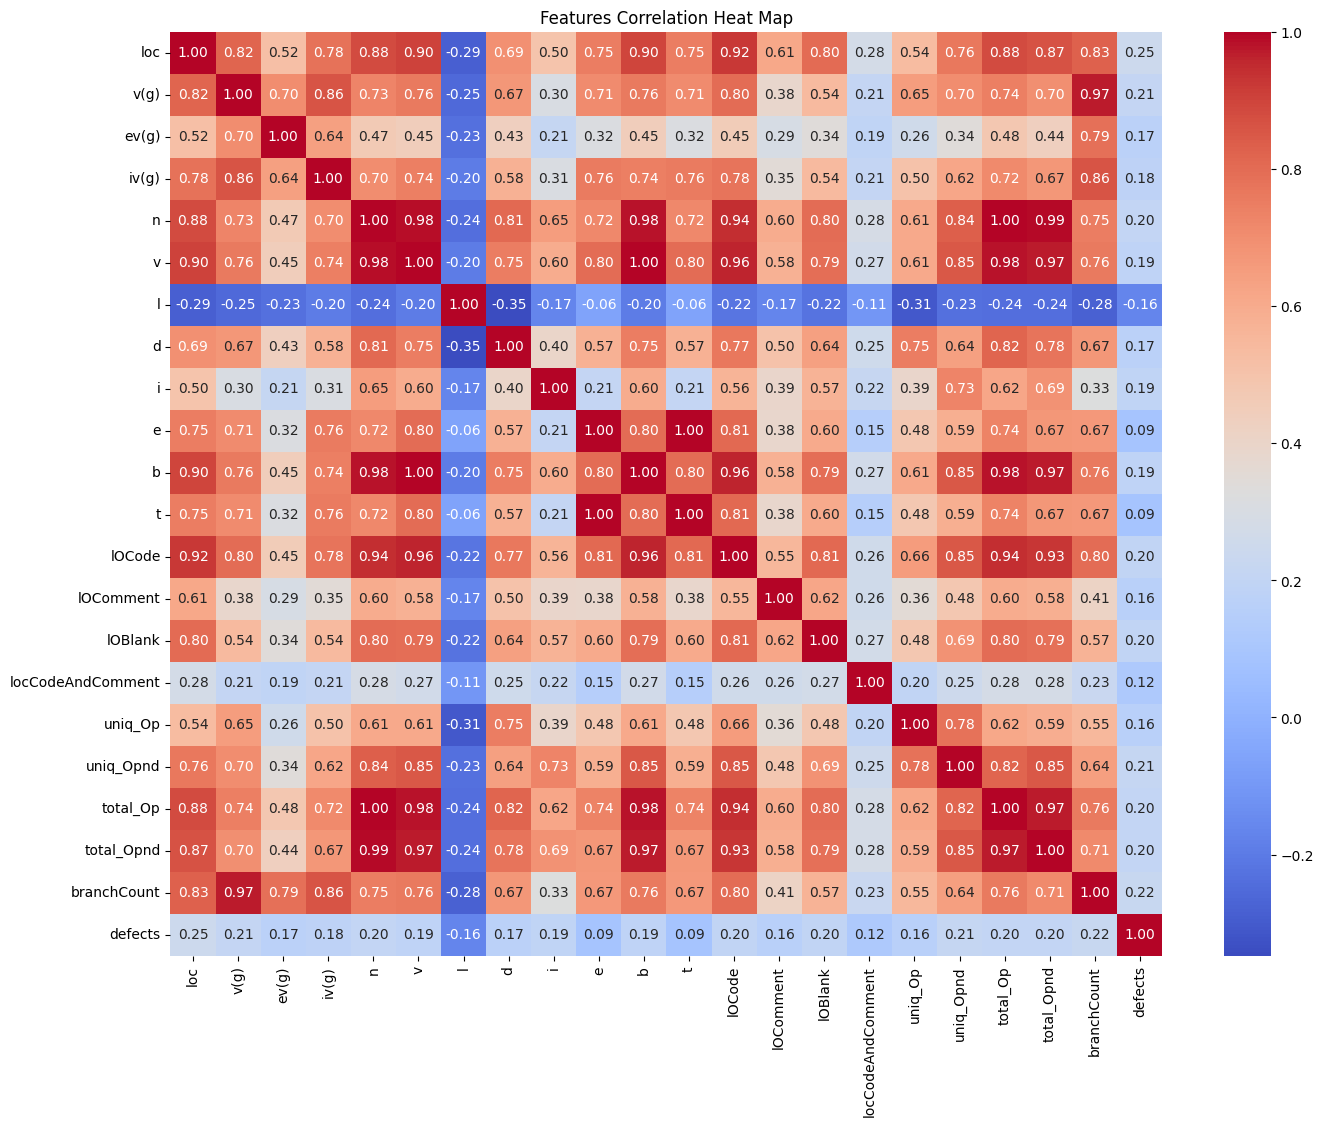

In [ ]:
# Plotting the features correlation heat map
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
correlation_matrix = scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Features Correlation Heat Map')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

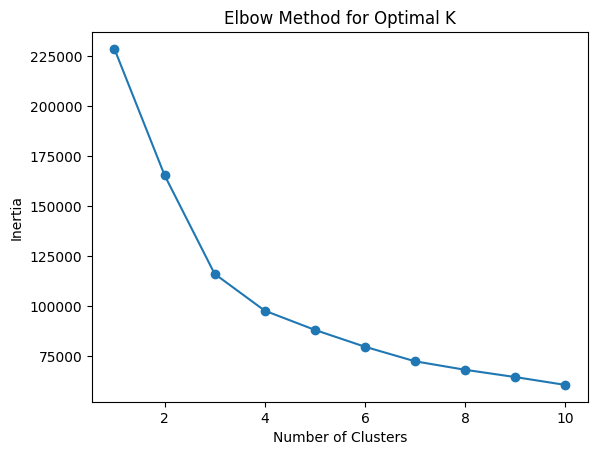

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        loc      v(g)     ev(g)     iv(g)         n         v         l  \
0 -0.534225 -0.380102 -0.295508 -0.285373 -0.453283 -0.346848  7.255076   
1 -0.535530 -0.410826 -0.354578 -0.329250 -0.454485 -0.347003  5.386279   
2  0.391486  0.050035 -0.354578  0.219208  0.335124  0.237456 -0.531578   
3  1.932161 -0.257206 -0.354578 -0.109867  1.946407  1.895536 -0.469285   
4 -0.065494 -0.180396 -0.354578 -0.000175  0.046536 -0.038498 -0.469285   

          d         i         e  ...  lOComment   lOBlank  locCodeAndComment  \
0 -0.688290 -0.817612 -0.084805  ...  -0.081873 -0.263405           0.853939   
1 -0.704325 -0.826329 -0.084806  ...  -0.192883 -0.363730           0.329798   
2  0.327797  0.767373 -0.031788  ...   0.806207  0.338540           0.329798   
3  0.154084  6.550025  0.086029  ...   2.915398  2.345027           0.853939   
4  0.161032  0.157495 -0.061101  ...  -0.192883  0.137892          -0.194344   

    uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  defects  

In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Drop the 'defects' column for clustering
clustering_data = scaled_df.drop(columns=['defects'])
# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose another strategy if needed

# Impute missing values
clustering_data_imputed = imputer.fit_transform(clustering_data)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_imputed)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# From the elbow curve, choose the optimal number of clusters
optimal_k = 2  # Example: Based on the plot, choose the optimal number of clusters

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_imputed)

# Add cluster labels to the DataFrame
scaled_df['cluster'] = clusters

# Print the first few rows of the DataFrame with cluster labels
print(scaled_df.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = scaled_df.drop(columns=['defects', 'cluster'])  # Features
y = scaled_df['defects']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize classifiers
svm_classifier = SVC(kernel='linear', random_state=42)
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Initialize stacking classifier
estimators = [('svm', svm_classifier), ('nb', nb_classifier), ('rf', rf_classifier)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=nb_classifier)

from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose another strategy if needed

# Impute missing values in X_train
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in X_test
X_test_imputed = imputer.transform(X_test)

# Train the classifiers with imputed data
svm_classifier.fit(X_train_imputed, y_train)
nb_classifier.fit(X_train_imputed, y_train)
rf_classifier.fit(X_train_imputed, y_train)
stacking_classifier.fit(X_train_imputed, y_train)

# Predictions
svm_pred = svm_classifier.predict(X_test_imputed)
nb_pred = nb_classifier.predict(X_test_imputed)
rf_pred = rf_classifier.predict(X_test_imputed)
stacking_pred = stacking_classifier.predict(X_test_imputed)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

# Print accuracies
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Stacking Classifier Accuracy:", stacking_accuracy)



SVM Accuracy: 0.8035068188143613
Naive Bayes Accuracy: 0.8054550514890064
Random Forest Accuracy: 0.812134706373504
Stacking Classifier Accuracy: 0.8143612580016699


In [ ]:
from sklearn.metrics import classification_report

# Calculate metrics for SVM
svm_report = classification_report(y_test, svm_pred)
print("SVM Metrics:")
print(svm_report)

# Calculate metrics for Naive Bayes
nb_report = classification_report(y_test, nb_pred)
print("\nNaive Bayes Metrics:")
print(nb_report)

# Calculate metrics for Random Forest
rf_report = classification_report(y_test, rf_pred)
print("\nRandom Forest Metrics:")
print(rf_report)

# Calculate metrics for Stacking Classifier
stacking_report = classification_report(y_test, stacking_pred)
print("\nStacking Classifier Metrics:")
print(stacking_report)


SVM Metrics:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2887
           1       0.50      0.01      0.03       706

    accuracy                           0.80      3593
   macro avg       0.65      0.51      0.46      3593
weighted avg       0.75      0.80      0.72      3593


Naive Bayes Metrics:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2887
           1       0.51      0.21      0.29       706

    accuracy                           0.81      3593
   macro avg       0.67      0.58      0.59      3593
weighted avg       0.77      0.81      0.77      3593


Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2887
           1       0.56      0.22      0.31       706

    accuracy                           0.81      3593
   macro avg       0.69      0.59      0.60      3593
weighted avg   

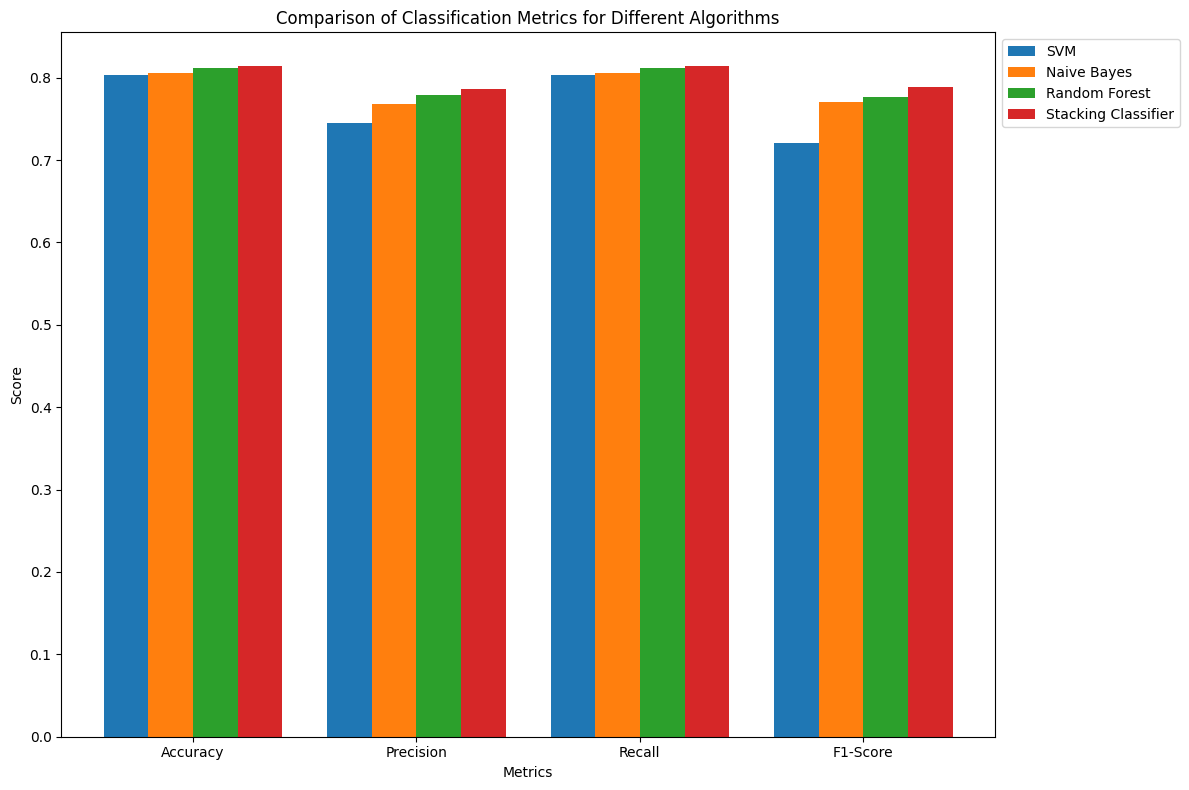

In [ ]:
import matplotlib.pyplot as plt

# Extracting metrics for SVM
svm_metrics = classification_report(y_test, svm_pred, output_dict=True)
svm_accuracy = svm_metrics['accuracy']
svm_precision = svm_metrics['weighted avg']['precision']
svm_recall = svm_metrics['weighted avg']['recall']
svm_f1_score = svm_metrics['weighted avg']['f1-score']

# Extracting metrics for Naive Bayes
nb_metrics = classification_report(y_test, nb_pred, output_dict=True)
nb_accuracy = nb_metrics['accuracy']
nb_precision = nb_metrics['weighted avg']['precision']
nb_recall = nb_metrics['weighted avg']['recall']
nb_f1_score = nb_metrics['weighted avg']['f1-score']

# Extracting metrics for Random Forest
rf_metrics = classification_report(y_test, rf_pred, output_dict=True)
rf_accuracy = rf_metrics['accuracy']
rf_precision = rf_metrics['weighted avg']['precision']
rf_recall = rf_metrics['weighted avg']['recall']
rf_f1_score = rf_metrics['weighted avg']['f1-score']

# Extracting metrics for Stacking Classifier
stacking_metrics = classification_report(y_test, stacking_pred, output_dict=True)
stacking_accuracy = stacking_metrics['accuracy']
stacking_precision = stacking_metrics['weighted avg']['precision']
stacking_recall = stacking_metrics['weighted avg']['recall']
stacking_f1_score = stacking_metrics['weighted avg']['f1-score']

# Plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_values = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]
nb_values = [nb_accuracy, nb_precision, nb_recall, nb_f1_score]
rf_values = [rf_accuracy, rf_precision, rf_recall, rf_f1_score]
stacking_values = [stacking_accuracy, stacking_precision, stacking_recall, stacking_f1_score]

x = range(len(labels))

plt.figure(figsize=(12, 8))  # Increase the figure size

plt.bar(x, svm_values, width=0.2, label='SVM', align='center')
plt.bar([i + 0.2 for i in x], nb_values, width=0.2, label='Naive Bayes', align='center')
plt.bar([i + 0.4 for i in x], rf_values, width=0.2, label='Random Forest', align='center')
plt.bar([i + 0.6 for i in x], stacking_values, width=0.2, label='Stacking Classifier', align='center')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Classification Metrics for Different Algorithms')
plt.xticks([i + 0.3 for i in x], labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()



In [ ]:
# prompt: i want to calculate MAE, RMSE, and MAPE, of applied algorithms

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate mean absolute error (MAE)
svm_mae = mean_absolute_error(y_test, svm_pred)
nb_mae = mean_absolute_error(y_test, nb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)

# Calculate root mean squared error (RMSE)
svm_rmse = mean_squared_error(y_test, svm_pred, squared=False)
nb_rmse = mean_squared_error(y_test, nb_pred, squared=False)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
stacking_rmse = mean_squared_error(y_test, stacking_pred, squared=False)


# Print the calculated metrics
print("SVM MAE:", svm_mae)
print("Naive Bayes MAE:", nb_mae)
print("Random Forest MAE:", rf_mae)
print("Stacking Classifier MAE:", stacking_mae)

print("\nSVM RMSE:", svm_rmse)
print("Naive Bayes RMSE:", nb_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Stacking Classifier RMSE:", stacking_rmse)




SVM MAE: 0.19649318118563874
Naive Bayes MAE: 0.1945449485109936
Random Forest MAE: 0.18786529362649595
Stacking Classifier MAE: 0.18563874199833008

SVM RMSE: 0.4432755138575091
Naive Bayes RMSE: 0.4410724980215765
Random Forest RMSE: 0.4334343013958355
Stacking Classifier RMSE: 0.4308581460275877


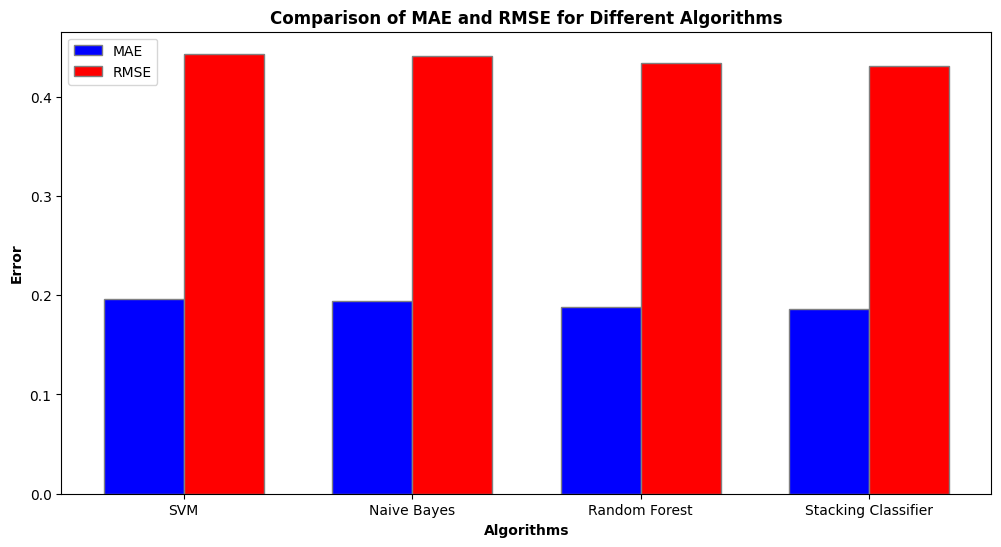

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the algorithms and their corresponding metrics
algorithms = ['SVM', 'Naive Bayes', 'Random Forest', 'Stacking Classifier']
mae_values = [svm_mae, nb_mae, rf_mae, stacking_mae]
rmse_values = [svm_rmse, nb_rmse, rf_rmse, stacking_rmse]

# Set the width of the bars
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(12, 6))

# Create bars
plt.bar(r1, mae_values, color='b', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, rmse_values, color='r', width=bar_width, edgecolor='grey', label='RMSE')

# Add labels
plt.xlabel('Algorithms', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Comparison of MAE and RMSE for Different Algorithms', fontweight='bold')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width/2 for r in range(len(algorithms))], algorithms)

# Create legend
plt.legend()

# Show plot
plt.show()



In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# X = data.data
# y= data.target

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [00:48<00:01,  1.78s/it]

[LightGBM] [Info] Number of positive: 1400, number of negative: 5892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3396
[LightGBM] [Info] Number of data points in the train set: 7292, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.191991 -> initscore=-1.437123
[LightGBM] [Info] Start training from score -1.437123


100%|██████████| 29/29 [00:48<00:00,  1.67s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.73               0.63     0.63      0.74   
NearestCentroid                    0.76               0.63     0.63      0.76   
DecisionTreeClassifier             0.75               0.60     0.60      0.75   
Perceptron                         0.78               0.60     0.60      0.76   
LabelPropagation                   0.80               0.60     0.60      0.77   
RandomForestClassifier             0.82               0.60     0.60      0.78   
LabelSpreading                     0.80               0.60     0.60      0.78   
BaggingClassifier                  0.81               0.60     0.60      0.78   
ExtraTreeClassifier                0.75               0.59     0.59      0.75   
ExtraTreesClassifier               0.81               0.59     0.59      0.78   
XGBClassifier               